In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from matplotlib import pyplot as plt

from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import gzip

import copy

import import_ipynb
from My_Functions import null_cols, rmse

importing Jupyter notebook from My_Functions.ipynb


In [2]:
acc_2_train = pd.read_csv("acc_2_train_feateng_dwnsmpl.csv.gz",
                                      compression='gzip',
                                      header=0,
                                      sep=',',
                                      quotechar='"')

target_2_train = pd.read_csv("target_2_train_feateng_dwnsmpl.csv.gz",
                                         compression='gzip',
                                         header=0,
                                         sep=',',
                                         quotechar='"')

acc_2_train_nogrades = pd.read_csv("acc_2_train_downsample_nogrades.csv.gz",
                                   compression='gzip',
                                   header=0,
                                   sep=',',
                                   quotechar='"')

In [3]:
# separate and drop 'total_pymnt'

ttlpy_2_dwnsmpl = copy.deepcopy(acc_2_train[['total_pymnt']])

acc_2_train = acc_2_train.drop('total_pymnt', axis=1)

acc_2_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,grouped_grade_NO_EG,grouped_subgrade_12_345,grouped_subgrade_123_45,grouped_subgrade,duration_of_credit_months,fico_score,sec_app_fico_score,annual_inc_reduced,annual_inc_joint_reduced,sec_app_duration_of_credit_months,weighted_loan_amnt,weighted_funded_amnt,weighted_installment,ratio_inc_loan,ratio_inc_weightedloan,ratio_redinc_loan,ratio_redinc_weightedloan,ratio_inc_funded,ratio_inc_weightedfunded,ratio_redinc_funded,ratio_redinc_weightedfunded,ratio_install_inc,ratio_weightedinstall_inc,ratio_install_redinc,ratio_weightedinstall_redinc,ratio_incjoint_loan,ratio_incjoint_weightedloan,ratio_redincjoint_loan,ratio_redincjoint_weightedloan,ratio_incjoint_funded,ratio_incjoint_weightedfunded,ratio_redincjoint_funded,ratio_redincjoint_weightedfunded,ratio_incjoint_installment,ratio_incjoint_weightedinstallment,ratio_redincjoint_installment,ratio_redincjoint_weightedinstallment,loan_minus_funded,ratio_loan_funded,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0.036709,0.036709,0.04875,0.0,0.276869,0.035167,0.166667,0.235294,0.636364,0.000000,0.008183,1.0,0.00977,1.0000,1.0000,0.076923,0.016129,0.000601,0.144845,0.051724,1.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.000000,1.0000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000004,0.000000,1.000000,0.000000,0.000000,0.000000,1.0000,1.0000,1.0000,1.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.016129,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.230769,0.230769,0.333333,0.124267,0.424628,0.0,0.008183,0.0,0.0,0.026007,0.026007,0.022514,0.007912,0.011868,0.007912,0.011868,0.007912,0.011868,0.007912,0.011868,0.007956,0.011934,0.007956,0.011934,0.000007,0.000005,0.000010,0.000006,0.000007,0.000005,0.000010,0.000006,0.000026,0.000008,0.000037,0.000012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.088608,0.088608,0.10000,0.0,0.150312,0.071577,0.166667,0.147059,0.272727,0.000000,0.002681,0.0,0.02428,1.0000,1.0000,0.153846,0.016129,0.002053,0.372680,0.114943,1.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000001,0.004897,0.000000,1.0000,0.000000e+00,0.000000,0.000000,0.000000,0.00074,0.000000,0.0000,0.003767,0.002745,0.303279,0.000004,0.117241,0.007702,0.025057,0.040293,0.019231,0.0015,1.0000,0.0005,1.0000,0.083333,0.062500,0.046875,0.056338,0.08125,0.047619,0.062016,0.086957,0.153846,1.000000,0.504950,0.083333,0.016129,0.004540,0.014569,0.008686,1.807924e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.153846,0.153846,0.208333,0.099648,0.360934,0.0,0.001877,0.0,0.0,0.09396

In [4]:
ttlpy_2_dwnsmpl_nogrades = copy.deepcopy(acc_2_train_nogrades[['total_pymnt']])

acc_2_train_nogrades = acc_2_train_nogrades.drop('total_pymnt', axis=1)

acc_2_train_nogrades

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,dti,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,annual_inc_reduced,annual_inc_joint_reduced,sec_app_duration_of_credit_months,weighted_loan_amnt,weighted_funded_amnt,weighted_installment,ratio_inc_loan,ratio_inc_weightedloan,ratio_redinc_loan,ratio_redinc_weightedloan,ratio_inc_funded,ratio_inc_weightedfunded,ratio_redinc_funded,ratio_redinc_weightedfunded,ratio_install_inc,ratio_weightedinstall_inc,ratio_install_redinc,ratio_weightedinstall_redinc,ratio_incjoint_loan,ratio_incjoint_weightedloan,ratio_redincjoint_loan,ratio_redincjoint_weightedloan,ratio_incjoint_funded,ratio_incjoint_weightedfunded,ratio_redincjoint_funded,ratio_redincjoint_weightedfunded,ratio_incjoint_installment,ratio_incjoint_weightedinstallment,ratio_redincjoint_installment,ratio_redincjoint_weightedinstallment,loan_minus_funded,ratio_loan_funded,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0.036709,0.036709,0.04875,0.0,0.276869,0.035167,0.636364,0.000000,0.008183,1.0,0.00977,1.0000,1.0000,0.076923,0.016129,0.000601,0.144845,0.051724,1.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.000000,1.0000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000004,0.000000,1.000000,0.000000,0.000000,0.000000,1.0000,1.0000,1.0000,1.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.016129,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124267,0.424628,0.0,0.008183,0.0,0.0,0.026007,0.026007,0.022514,0.007912,0.011868,0.007912,0.011868,0.007912,0.011868,0.007912,0.011868,0.007956,0.011934,0.007956,0.011934,0.000007,0.000005,0.000010,0.000006,0.000007,0.000005,0.000010,0.000006,0.000026,0.000008,0.000037,0.000012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.088608,0.088608,0.10000,0.0,0.150312,0.071577,0.272727,0.000000,0.002681,0.0,0.02428,1.0000,1.0000,0.153846,0.016129,0.002053,0.372680,0.114943,1.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000001,0.004897,0.000000,1.0000,0.000000e+00,0.000000,0.000000,0.000000,0.00074,0.000000,0.0000,0.003767,0.002745,0.303279,0.000004,0.117241,0.007702,0.025057,0.040293,0.019231,0.0015,1.0000,0.0005,1.0000,0.083333,0.062500,0.046875,0.056338,0.08125,0.047619,0.062016,0.086957,0.153846,1.000000,0.504950,0.083333,0.016129,0.004540,0.014569,0.008686,1.807924e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099648,0.360934,0.0,0.001877,0.0,0.0,0.093960,0.093960,0.071670,0.001264,0.001264,0.000885,0.000885,0.001264,0.001264,0.000885,0.000885,0.001332,0.001332,0.000932,0.000932,0.000008,0.000005,0.000011,0.000008,0.000008,0.000005,0.000011,0.000008,0

In [5]:
state=0

# downsampled:
xtrain_ds, xtest_ds, ytrain_ds, ytest_ds = ms.train_test_split(acc_2_train,
                                                               target_2_train,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain_ds = ytrain_ds.values.flatten()


# no grades:
xtrain_no, xtest_no, ytrain_no, ytest_no = ms.train_test_split(acc_2_train_nogrades,
                                                               target_2_train,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain_no = ytrain_no.values.flatten()


# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

## Downsampled Data

In [6]:
xgb_clsfr_ds = xgb.XGBClassifier()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [state]
booster_ = ['gbtree']

# nestimators = [100]
# minchildweight = [1, 5]
# maxdepth = [1, 3]
# learningrate = [0.1, 1]
# gamma_ = [0.5, 2]
# subsample_ = [0.8, 1]
# colsamplebytree = [0.8, 1]


gparam_xgb_ds = {'objective': objective_,
                 'eval_metric': evalmetric,
                 'use_label_encoder': uselabelencoder,
                 'tree_method': treemethod,
                 'predictor': predictor_,
                 'n_jobs': njobs,
                 'booster': booster_,
#               'n_estimators': nestimators,
#               'min_child_weight': minchildweight,
#               'max_depth': maxdepth,
#               'learning_rate': learningrate,
#               'gamma': gamma_,
#               'subsample': subsample_,
#               'colsample_bytree': colsamplebytree,
                 'random_state': randomstate}


gs_xgb_ds = ms.GridSearchCV(xgb_clsfr_ds, gparam_xgb_ds, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_xgb_ds.fit(xtrain_ds, ytrain_ds)

# setting up dataframe for results
train_scores.append(gs_xgb_ds.best_estimator_.score(xtrain_ds, ytrain_ds))
test_scores.append(gs_xgb_ds.best_estimator_.score(xtest_ds, ytest_ds))


# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_ds, ytrain_ds, xtrain_ds))
test_rmse.append(rmse(gs_xgb_ds, ytest_ds, xtest_ds))

# add the best parameters to the df
best_par_list.append(gs_xgb_ds.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_ds, gs_xgb_ds.predict(xtrain_ds)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_ds, gs_xgb_ds.predict(xtest_ds)))

res_df

Wall time: 14.4 s


confusion matrix for train set
[[75299 32411]
 [29639 78139]]


confusion matrix for test set
[[17545  9425]
 [ 8761 18141]]


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,booster,eval_metric,n_jobs,objective,predictor,random_state,tree_method,use_label_encoder
0,0.712049,0.662422,0.536611,0.581015,-0.044404,gbtree,auc,-1,binary:logistic,gpu_predictor,0,gpu_hist,False


In [7]:
sorted_importance = sorted(zip(xtrain_ds.columns,
                               gs_xgb_ds.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance

[('grade', 0.35620102),
 ('grouped_subgrade_12_345', 0.11448237),
 ('sub_grade', 0.09899811),
 ('term', 0.029733254),
 ('ratio_inc_weightedfunded', 0.012002034),
 ('ratio_inc_weightedloan', 0.010097087),
 ('grouped_subgrade_123_45', 0.009493249),
 ('home_ownership', 0.009012968),
 ('ratio_redincjoint_weightedloan', 0.007928363),
 ('open_act_il', 0.007358236),
 ('emp_length', 0.006643425),
 ('num_actv_rev_tl', 0.006633111),
 ('ratio_weightedinstall_inc', 0.00659854),
 ('avg_cur_bal', 0.006593424),
 ('verification_status', 0.006263544),
 ('all_util', 0.00621808),
 ('purpose_small_business', 0.0061386684),
 ('mort_acc', 0.0057572494),
 ('ratio_inc_funded', 0.0054698507),
 ('dti', 0.0052095354),
 ('mths_since_recent_bc', 0.0046653543),
 ('fico_score', 0.0043933145),
 ('num_rev_tl_bal_gt_0', 0.00394946),
 ('purpose_medical', 0.003901963),
 ('mths_since_rcnt_il', 0.0038679552),
 ('ratio_redinc_funded', 0.0038551907),
 ('ratio_incjoint_funded', 0.0037785666),
 ('mths_since_recent_inq', 0.0037

In [8]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.61


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.61')

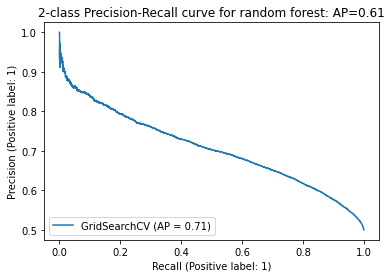

In [9]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_xgb_ds, xtest_ds, ytest_ds)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [10]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))
recall_score = metrics.recall_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))
precision_score = metrics.precision_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.67
recall score: 0.67
precision score: 0.66


In [11]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_ds, gs_xgb_ds.predict(xtest_ds))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6624370574838342

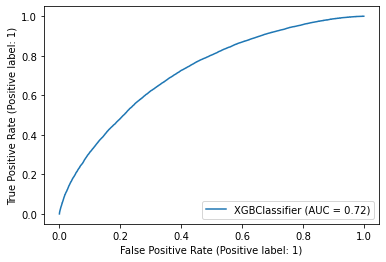

In [12]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_xgb_ds.best_estimator_, xtest_ds, ytest_ds) 

In [13]:
filtered_sorted_importance = [x for x in sorted_importance if x[1]>0.003]
filtered_sorted_importance

[('grade', 0.35620102),
 ('grouped_subgrade_12_345', 0.11448237),
 ('sub_grade', 0.09899811),
 ('term', 0.029733254),
 ('ratio_inc_weightedfunded', 0.012002034),
 ('ratio_inc_weightedloan', 0.010097087),
 ('grouped_subgrade_123_45', 0.009493249),
 ('home_ownership', 0.009012968),
 ('ratio_redincjoint_weightedloan', 0.007928363),
 ('open_act_il', 0.007358236),
 ('emp_length', 0.006643425),
 ('num_actv_rev_tl', 0.006633111),
 ('ratio_weightedinstall_inc', 0.00659854),
 ('avg_cur_bal', 0.006593424),
 ('verification_status', 0.006263544),
 ('all_util', 0.00621808),
 ('purpose_small_business', 0.0061386684),
 ('mort_acc', 0.0057572494),
 ('ratio_inc_funded', 0.0054698507),
 ('dti', 0.0052095354),
 ('mths_since_recent_bc', 0.0046653543),
 ('fico_score', 0.0043933145),
 ('num_rev_tl_bal_gt_0', 0.00394946),
 ('purpose_medical', 0.003901963),
 ('mths_since_rcnt_il', 0.0038679552),
 ('ratio_redinc_funded', 0.0038551907),
 ('ratio_incjoint_funded', 0.0037785666),
 ('mths_since_recent_inq', 0.0037

In [14]:
# get list of column names for easier application in the future
filter_important = []
for tup in filtered_sorted_importance:
    filter_important.append(tup[0])

filter_important

['grade',
 'grouped_subgrade_12_345',
 'sub_grade',
 'term',
 'ratio_inc_weightedfunded',
 'ratio_inc_weightedloan',
 'grouped_subgrade_123_45',
 'home_ownership',
 'ratio_redincjoint_weightedloan',
 'open_act_il',
 'emp_length',
 'num_actv_rev_tl',
 'ratio_weightedinstall_inc',
 'avg_cur_bal',
 'verification_status',
 'all_util',
 'purpose_small_business',
 'mort_acc',
 'ratio_inc_funded',
 'dti',
 'mths_since_recent_bc',
 'fico_score',
 'num_rev_tl_bal_gt_0',
 'purpose_medical',
 'mths_since_rcnt_il',
 'ratio_redinc_funded',
 'ratio_incjoint_funded',
 'mths_since_recent_inq',
 'mo_sin_old_rev_tl_op',
 'total_bc_limit',
 'mo_sin_rcnt_tl',
 'initial_list_status_w',
 'weighted_funded_amnt',
 'sec_app_revol_util',
 'funded_amnt',
 'purpose_house',
 'int_rate',
 'ratio_incjoint_installment',
 'sec_app_inq_last_6mths',
 'ratio_inc_loan',
 'sec_app_fico_score',
 'revol_bal',
 'purpose_home_improvement',
 'purpose_credit_card',
 'ratio_incjoint_weightedloan',
 'ratio_incjoint_loan',
 'num_bc

In [15]:
len(filter_important)

53

In [16]:
acc_2_train2 = copy.deepcopy(acc_2_train[filter_important])

In [17]:
state=0

# downsampled:
xtrain, xtest, ytrain, ytest = ms.train_test_split(acc_2_train2,
                                                               target_2_train,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain = ytrain.values.flatten()


# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [18]:
xgb_clsfr = xgb.XGBClassifier()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [state]
booster_ = ['gbtree']

# nestimators = [100]
# minchildweight = [1, 5]
# maxdepth = [1, 3]
# learningrate = [0.1, 1]
# gamma_ = [0.5, 2]
# subsample_ = [0.8, 1]
# colsamplebytree = [0.8, 1]


gparam_xgb = {'objective': objective_,
                 'eval_metric': evalmetric,
                 'use_label_encoder': uselabelencoder,
                 'tree_method': treemethod,
                 'predictor': predictor_,
                 'n_jobs': njobs,
                 'booster': booster_,
#               'n_estimators': nestimators,
#               'min_child_weight': minchildweight,
#               'max_depth': maxdepth,
#               'learning_rate': learningrate,
#               'gamma': gamma_,
#               'subsample': subsample_,
#               'colsample_bytree': colsamplebytree,
                 'random_state': randomstate}


gs_xgb = ms.GridSearchCV(xgb_clsfr, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_xgb.best_estimator_.score(xtest, ytest))


# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_xgb.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain, gs_xgb.predict(xtrain)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest, gs_xgb.predict(xtest)))

res_df

Wall time: 9.18 s


confusion matrix for train set
[[74263 33447]
 [30669 77109]]


confusion matrix for test set
[[17479  9491]
 [ 8772 18130]]


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,booster,eval_metric,n_jobs,objective,predictor,random_state,tree_method,use_label_encoder
0,0.702461,0.660993,0.545471,0.582243,-0.036772,gbtree,auc,-1,binary:logistic,gpu_predictor,0,gpu_hist,False


In [19]:
sorted_importance = sorted(zip(xtrain.columns,
                               gs_xgb.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance

[('grade', 0.41448128),
 ('sub_grade', 0.12163912),
 ('grouped_subgrade_12_345', 0.09684392),
 ('term', 0.048466966),
 ('grouped_subgrade_123_45', 0.028327731),
 ('ratio_inc_weightedloan', 0.021128602),
 ('home_ownership', 0.015837517),
 ('num_actv_rev_tl', 0.009151613),
 ('all_util', 0.008612248),
 ('emp_length', 0.008297969),
 ('purpose_small_business', 0.008222832),
 ('mort_acc', 0.0078114043),
 ('avg_cur_bal', 0.0076899733),
 ('verification_status', 0.0076691853),
 ('ratio_inc_weightedfunded', 0.0074483827),
 ('open_act_il', 0.0072716414),
 ('ratio_inc_loan', 0.0071653267),
 ('ratio_weightedinstall_inc', 0.0070714173),
 ('dti', 0.006955812),
 ('purpose_medical', 0.0063346527),
 ('fico_score', 0.0061051673),
 ('mths_since_recent_bc', 0.0060342187),
 ('int_rate', 0.0057343175),
 ('mths_since_recent_inq', 0.0056614727),
 ('total_bc_limit', 0.0055355453),
 ('mo_sin_old_rev_tl_op', 0.0050933016),
 ('num_rev_tl_bal_gt_0', 0.0050459737),
 ('ratio_incjoint_loan', 0.0049701002),
 ('total_re

In [20]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest, gs_xgb.predict(xtest))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.61


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.61')

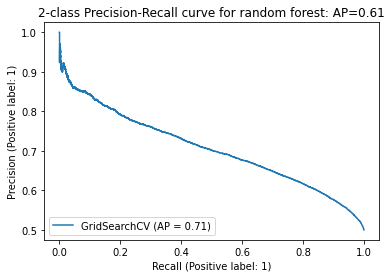

In [21]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_xgb, xtest, ytest)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [22]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest, gs_xgb.predict(xtest))
recall_score = metrics.recall_score(ytest, gs_xgb.predict(xtest))
precision_score = metrics.precision_score(ytest, gs_xgb.predict(xtest))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.67
recall score: 0.67
precision score: 0.66


In [23]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest, gs_xgb.predict(xtest))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6610090299602118

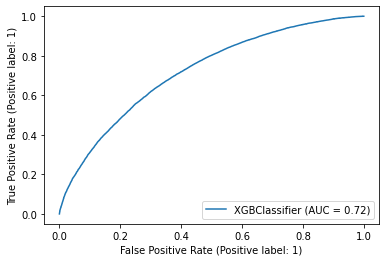

In [24]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_xgb.best_estimator_, xtest, ytest) 

In [25]:
filtered_sorted_importance = [x for x in sorted_importance if x[1]>0.003]
filtered_sorted_importance

[('grade', 0.41448128),
 ('sub_grade', 0.12163912),
 ('grouped_subgrade_12_345', 0.09684392),
 ('term', 0.048466966),
 ('grouped_subgrade_123_45', 0.028327731),
 ('ratio_inc_weightedloan', 0.021128602),
 ('home_ownership', 0.015837517),
 ('num_actv_rev_tl', 0.009151613),
 ('all_util', 0.008612248),
 ('emp_length', 0.008297969),
 ('purpose_small_business', 0.008222832),
 ('mort_acc', 0.0078114043),
 ('avg_cur_bal', 0.0076899733),
 ('verification_status', 0.0076691853),
 ('ratio_inc_weightedfunded', 0.0074483827),
 ('open_act_il', 0.0072716414),
 ('ratio_inc_loan', 0.0071653267),
 ('ratio_weightedinstall_inc', 0.0070714173),
 ('dti', 0.006955812),
 ('purpose_medical', 0.0063346527),
 ('fico_score', 0.0061051673),
 ('mths_since_recent_bc', 0.0060342187),
 ('int_rate', 0.0057343175),
 ('mths_since_recent_inq', 0.0056614727),
 ('total_bc_limit', 0.0055355453),
 ('mo_sin_old_rev_tl_op', 0.0050933016),
 ('num_rev_tl_bal_gt_0', 0.0050459737),
 ('ratio_incjoint_loan', 0.0049701002),
 ('total_re

In [26]:
# get list of column names for easier application in the future
filter_important = []
for tup in filtered_sorted_importance:
    filter_important.append(tup[0])

filter_important

['grade',
 'sub_grade',
 'grouped_subgrade_12_345',
 'term',
 'grouped_subgrade_123_45',
 'ratio_inc_weightedloan',
 'home_ownership',
 'num_actv_rev_tl',
 'all_util',
 'emp_length',
 'purpose_small_business',
 'mort_acc',
 'avg_cur_bal',
 'verification_status',
 'ratio_inc_weightedfunded',
 'open_act_il',
 'ratio_inc_loan',
 'ratio_weightedinstall_inc',
 'dti',
 'purpose_medical',
 'fico_score',
 'mths_since_recent_bc',
 'int_rate',
 'mths_since_recent_inq',
 'total_bc_limit',
 'mo_sin_old_rev_tl_op',
 'num_rev_tl_bal_gt_0',
 'ratio_incjoint_loan',
 'total_rev_hi_lim',
 'sec_app_inq_last_6mths',
 'sec_app_revol_util',
 'purpose_credit_card',
 'revol_bal',
 'mths_since_last_record',
 'initial_list_status_w',
 'ratio_incjoint_funded',
 'mo_sin_rcnt_tl',
 'ratio_incjoint_installment',
 'purpose_vacation',
 'funded_amnt',
 'ratio_redincjoint_weightedloan',
 'mths_since_rcnt_il',
 'purpose_home_improvement',
 'mths_since_last_major_derog',
 'ratio_inc_funded',
 'weighted_funded_amnt',
 'se

# No Grades

In [27]:
xgb_clsfr_no = xgb.XGBClassifier()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [state]
booster_ = ['gbtree']

# nestimators = [100]
# minchildweight = [1, 5]
# maxdepth = [1, 3]
# learningrate = [0.1, 1]
# gamma_ = [0.5, 2]
# subsample_ = [0.8, 1]
# colsamplebytree = [0.8, 1]


gparam_xgb_no = {'objective': objective_,
                 'eval_metric': evalmetric,
                 'use_label_encoder': uselabelencoder,
                 'tree_method': treemethod,
                 'predictor': predictor_,
                 'n_jobs': njobs,
                 'booster': booster_,
#               'n_estimators': nestimators,
#               'min_child_weight': minchildweight,
#               'max_depth': maxdepth,
#               'learning_rate': learningrate,
#               'gamma': gamma_,
#               'subsample': subsample_,
#               'colsample_bytree': colsamplebytree,
                 'random_state': randomstate}


gs_xgb_no = ms.GridSearchCV(xgb_clsfr_no, gparam_xgb_no, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_xgb_no.fit(xtrain_no, ytrain_no)

# setting up dataframe for results
train_scores.append(gs_xgb_no.best_estimator_.score(xtrain_no, ytrain_no))
test_scores.append(gs_xgb_no.best_estimator_.score(xtest_no, ytest_no))


# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_no, ytrain_no, xtrain_no))
test_rmse.append(rmse(gs_xgb_no, ytest_no, xtest_no))

# add the best parameters to the df
best_par_list.append(gs_xgb_no.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_no, gs_xgb_no.predict(xtrain_no)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_no, gs_xgb_no.predict(xtest_no)))

res_df

Wall time: 13.6 s


confusion matrix for train set
[[75385 32325]
 [29773 78005]]


confusion matrix for test set
[[17508  9462]
 [ 8769 18133]]


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,booster,eval_metric,n_jobs,objective,predictor,random_state,tree_method,use_label_encoder
0,0.711826,0.661587,0.536818,0.581733,-0.044915,gbtree,auc,-1,binary:logistic,gpu_predictor,0,gpu_hist,False


In [28]:
sorted_importance_no = sorted(zip(xtrain_no.columns,
                               gs_xgb_no.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance_no

[('int_rate', 0.13365045),
 ('term', 0.06999161),
 ('ratio_inc_weightedfunded', 0.032048337),
 ('all_util', 0.018652387),
 ('ratio_inc_funded', 0.017296001),
 ('ratio_weightedinstall_inc', 0.016930766),
 ('home_ownership', 0.015957717),
 ('ratio_inc_weightedloan', 0.015664674),
 ('num_actv_rev_tl', 0.01351781),
 ('avg_cur_bal', 0.01305414),
 ('verification_status', 0.013040102),
 ('mort_acc', 0.0129259555),
 ('open_act_il', 0.0128393),
 ('purpose_small_business', 0.0125710415),
 ('emp_length', 0.012090215),
 ('dti', 0.010528333),
 ('fico_score', 0.009924303),
 ('initial_list_status_w', 0.009372652),
 ('mths_since_recent_inq', 0.009242295),
 ('ratio_incjoint_weightedfunded', 0.009178786),
 ('ratio_inc_loan', 0.008199978),
 ('total_bc_limit', 0.008148972),
 ('mths_since_recent_bc', 0.008140673),
 ('purpose_medical', 0.008019596),
 ('ratio_incjoint_funded', 0.007689926),
 ('mo_sin_old_rev_tl_op', 0.0075178766),
 ('num_rev_tl_bal_gt_0', 0.007460995),
 ('sec_app_inq_last_6mths', 0.007428599

In [29]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest_no, gs_xgb_no.predict(xtest_no))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.61


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.61')

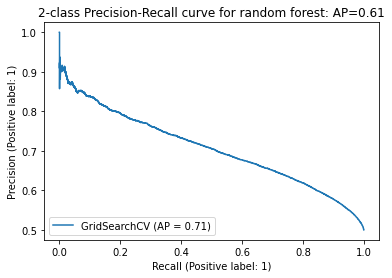

In [30]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_xgb_no, xtest_no, ytest_no)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [31]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_no, gs_xgb_no.predict(xtest_no))
recall_score = metrics.recall_score(ytest_no, gs_xgb_no.predict(xtest_no))
precision_score = metrics.precision_score(ytest_no, gs_xgb_no.predict(xtest_no))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.67
recall score: 0.67
precision score: 0.66


In [32]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_no, gs_xgb_no.predict(xtest_no))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6616024223050267

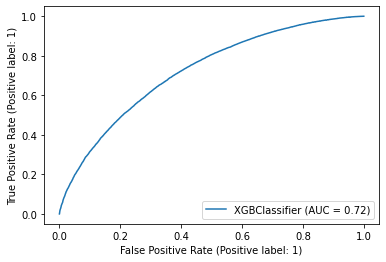

In [33]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_xgb_no.best_estimator_, xtest_no, ytest_no) 

In [34]:
filtered_sorted_importance_no = [x for x in sorted_importance_no if x[1]>0.003]
filtered_sorted_importance_no

[('int_rate', 0.13365045),
 ('term', 0.06999161),
 ('ratio_inc_weightedfunded', 0.032048337),
 ('all_util', 0.018652387),
 ('ratio_inc_funded', 0.017296001),
 ('ratio_weightedinstall_inc', 0.016930766),
 ('home_ownership', 0.015957717),
 ('ratio_inc_weightedloan', 0.015664674),
 ('num_actv_rev_tl', 0.01351781),
 ('avg_cur_bal', 0.01305414),
 ('verification_status', 0.013040102),
 ('mort_acc', 0.0129259555),
 ('open_act_il', 0.0128393),
 ('purpose_small_business', 0.0125710415),
 ('emp_length', 0.012090215),
 ('dti', 0.010528333),
 ('fico_score', 0.009924303),
 ('initial_list_status_w', 0.009372652),
 ('mths_since_recent_inq', 0.009242295),
 ('ratio_incjoint_weightedfunded', 0.009178786),
 ('ratio_inc_loan', 0.008199978),
 ('total_bc_limit', 0.008148972),
 ('mths_since_recent_bc', 0.008140673),
 ('purpose_medical', 0.008019596),
 ('ratio_incjoint_funded', 0.007689926),
 ('mo_sin_old_rev_tl_op', 0.0075178766),
 ('num_rev_tl_bal_gt_0', 0.007460995),
 ('sec_app_inq_last_6mths', 0.007428599

In [35]:
# get list of column names for easier application in the future
filter_important = []
for tup in filtered_sorted_importance_no:
    filter_important.append(tup[0])

filter_important

['int_rate',
 'term',
 'ratio_inc_weightedfunded',
 'all_util',
 'ratio_inc_funded',
 'ratio_weightedinstall_inc',
 'home_ownership',
 'ratio_inc_weightedloan',
 'num_actv_rev_tl',
 'avg_cur_bal',
 'verification_status',
 'mort_acc',
 'open_act_il',
 'purpose_small_business',
 'emp_length',
 'dti',
 'fico_score',
 'initial_list_status_w',
 'mths_since_recent_inq',
 'ratio_incjoint_weightedfunded',
 'ratio_inc_loan',
 'total_bc_limit',
 'mths_since_recent_bc',
 'purpose_medical',
 'ratio_incjoint_funded',
 'mo_sin_old_rev_tl_op',
 'num_rev_tl_bal_gt_0',
 'sec_app_inq_last_6mths',
 'purpose_vacation',
 'delinq_amnt',
 'ratio_incjoint_weightedinstallment',
 'sec_app_revol_util',
 'mo_sin_rcnt_tl',
 'sec_app_mths_since_last_major_derog',
 'sec_app_fico_score',
 'funded_amnt_inv',
 'annual_inc_joint',
 'ratio_incjoint_weightedloan',
 'purpose_credit_card',
 'mths_since_last_record',
 'pub_rec_bankruptcies',
 'ratio_redincjoint_weightedloan',
 'num_actv_bc_tl',
 'bc_open_to_buy',
 'purpose_m